In [3]:
# NAVER api 예시 코드

#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
client_id = "MTzGNJ1x7SBWw2OzSpdJ"
client_secret = "lBA9R_2v3X"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2017-01-01\",\"endDate\":\"2017-04-30\",\"timeUnit\":\"month\",\"keywordGroups\":[{\"groupName\":\"한글\",\"keywords\":[\"한글\",\"korean\"]},{\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"],\"gender\":\"f\"}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{"startDate":"2017-01-01","endDate":"2017-04-30","timeUnit":"month","results":[{"title":"한글","keywords":["한글","korean"],"data":[{"period":"2017-01-01","ratio":47.00101},{"period":"2017-02-01","ratio":53.23619},{"period":"2017-03-01","ratio":100},{"period":"2017-04-01","ratio":85.327}]},{"title":"영어","keywords":["영어","english"],"data":[{"period":"2017-01-01","ratio":40.0881},{"period":"2017-02-01","ratio":36.69942},{"period":"2017-03-01","ratio":52.11792},{"period":"2017-04-01","ratio":44.4595}]}]}


In [4]:
# 좀 더 쉬운 코드

import requests
import pandas as pd

url = "https://openapi.naver.com/v1/datalab/search"

# 부가 정보
headers = {
    'Content-Type': 'application/json; charset=utf-8',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret,
}

# 본 데이터
data = {
    "startDate":"2017-01-01",
    "endDate":"2017-04-30",
    "timeUnit":"month",
    "keywordGroups":[
        {
            "groupName":"한글",
            "keywords":["한글","korean"]
        },
        {
            "groupName":"영어",
            "keywords":["영어", "english"]
        }
    ],
    "device":"pc",
    "ages":["1", "2"],
    "gender":"f"
}

response = requests.post(url, headers=headers, json=data)


In [7]:
response

<Response [200]>

In [8]:
result = response.json()
result

{'startDate': '2017-01-01',
 'endDate': '2017-04-30',
 'timeUnit': 'month',
 'results': [{'title': '한글',
   'keywords': ['한글', 'korean'],
   'data': [{'period': '2017-01-01', 'ratio': 47.00101},
    {'period': '2017-02-01', 'ratio': 53.23619},
    {'period': '2017-03-01', 'ratio': 100},
    {'period': '2017-04-01', 'ratio': 85.327}]},
  {'title': '영어',
   'keywords': ['영어', 'english'],
   'data': [{'period': '2017-01-01', 'ratio': 40.0881},
    {'period': '2017-02-01', 'ratio': 36.69942},
    {'period': '2017-03-01', 'ratio': 52.11792},
    {'period': '2017-04-01', 'ratio': 44.4595}]}]}

In [14]:
result['results'][0]

{'title': '한글',
 'keywords': ['한글', 'korean'],
 'data': [{'period': '2017-01-01', 'ratio': 47.00101},
  {'period': '2017-02-01', 'ratio': 53.23619},
  {'period': '2017-03-01', 'ratio': 100},
  {'period': '2017-04-01', 'ratio': 85.327}]}

In [17]:
result['results'][0]['title']

'한글'

In [18]:
result['results'][0]['data']

[{'period': '2017-01-01', 'ratio': 47.00101},
 {'period': '2017-02-01', 'ratio': 53.23619},
 {'period': '2017-03-01', 'ratio': 100},
 {'period': '2017-04-01', 'ratio': 85.327}]

In [21]:
df1 = pd.DataFrame(result['results'][0]['data'])

df1['title'] = result['results'][0]['title']

In [22]:
df1

,period,ratio,title
0,2017-01-01,47.00101,한글
1,2017-02-01,53.23619,한글
2,2017-03-01,100.00000,한글
3,2017-04-01,85.32700,한글


In [23]:
df2 = pd.DataFrame(result['results'][1]['data'])

df2['title'] = result['results'][1]['title']

In [24]:
df2

,period,ratio,title
0,2017-01-01,40.08810,영어
1,2017-02-01,36.69942,영어
2,2017-03-01,52.11792,영어
3,2017-04-01,44.45950,영어


In [25]:
df = pd.concat([df1, df2], axis=0)
df

,period,ratio,title
0,2017-01-01,47.00101,한글
1,2017-02-01,53.23619,한글
2,2017-03-01,100.00000,한글
3,2017-04-01,85.32700,한글
0,2017-01-01,40.08810,영어
1,2017-02-01,36.69942,영어
2,2017-03-01,52.11792,영어
3,2017-04-01,44.45950,영어


<AxesSubplot:xlabel='period', ylabel='ratio'>

/Users/geoffrey/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geoffrey/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geoffrey/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geoffrey/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/geoffrey/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/geoffrey/opt/anaconda3/lib/python3.7/site-pac

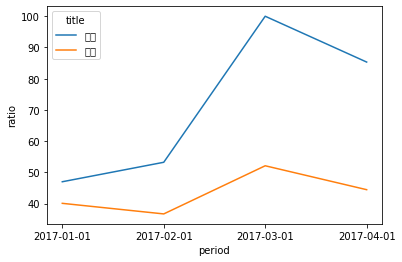

In [27]:
import seaborn as sns

sns.lineplot(data=df, x='period', y='ratio', hue='title')